In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [2]:
# loading csv file
df = pd.read_csv('../datasets/breast-cancer-wisconsin.data', names=['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status'], na_values='?')

print(df.isnull().sum())
df.head(15)

sample         0
thickness      0
size           0
shape          0
adhesion       0
epithelial     0
nuclei        16
chromatin      0
nucleoli       0
mitoses        0
status         0
dtype: int64


,sample,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [3]:
y = df['status']
X = df.drop(columns=['status', 'sample'])
# 'status' goes for labels and number of 'sample' isn't important

print(X.dtypes)
X.head(15)

thickness       int64
size            int64
shape           int64
adhesion        int64
epithelial      int64
nuclei        float64
chromatin       int64
nucleoli        int64
mitoses         int64
dtype: object


,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
5,8,10,10,8,7,10.0,9,7,1
6,1,1,1,1,2,10.0,3,1,1
7,2,1,2,1,2,1.0,3,1,1
8,2,1,1,1,2,1.0,1,1,5
9,4,2,1,1,2,1.0,2,1,1


In [4]:
# cleaning
X.fillna(X.mean(), inplace=True)
# changing NaN values for mean values

print(X.isna().sum())

# making correction of types
X['nuclei'] = X['nuclei'].astype('int64')
print(X.dtypes)
X.head(10)

thickness     0
size          0
shape         0
adhesion      0
epithelial    0
nuclei        0
chromatin     0
nucleoli      0
mitoses       0
dtype: int64
thickness     int64
size          int64
shape         int64
adhesion      int64
epithelial    int64
nuclei        int64
chromatin     int64
nucleoli      int64
mitoses       int64
dtype: object


,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(11)

In [6]:
# preprocessing
preprocesser = MinMaxScaler()
preprocesser.fit(X)
X = preprocesser.transform(X)

# decomposition
pca = PCA()

# classifier
knn = KNeighborsClassifier()

# pipeline
pipeline = Pipeline(steps=[('pca', pca), ('knn', knn)])


n_components = np.arange(2, 6)
n_neighbors  = np.arange(2, 9)
weights      = ['uniform', 'distance']

parameters = dict(pca__n_components=n_components, 
                  knn__n_neighbors =n_neighbors,
                  knn__weights     =weights)

In [7]:
# searching for best model and fitting
model = GridSearchCV(pipeline, parameters, cv=7)

model.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([2, 3, 4, 5, 6, 7, 8]),
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': array([2, 3, 4, 5])})

In [8]:
print('Best number of PCA components:', model.best_estimator_.get_params()['pca__n_components'])
print('Best number of neighbors:', model.best_estimator_.get_params()['knn__n_neighbors'])
print('Best weights:', model.best_estimator_.get_params()['knn__weights'])
print('Best scores:', model.best_score_)

Best number of PCA components: 2
Best number of neighbors: 7
Best weights: uniform
Best scores: 0.9671139971139973


In [9]:
def plottingFun(model, X, y):
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    
    padding    = 0.1
    resolution = 0.1
    
    # !!! (2 for benign, 4 for malignant)
    colors = {2:'royalblue', 4:'lightsalmon'}
    
    
    # calculate boundaries
    X_min, X_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    X_range = X_max - X_min
    y_range = y_max - y_min
    X_min  -= X_range * padding
    y_min  -= y_range * padding
    X_max  += X_range * padding
    y_max  += y_range * padding
    
    
    xx, yy = np.meshgrid(np.arange(X_min, X_max, resolution), np.arange(y_min, y_max, resolution))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
    plt.axis('tight')
    
    
    for label in np.unique(y):
        indices = np.where(y==label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.7)
        
    plt.title('K = ' + str(model.get_params()['n_neighbors']))
    plt.show()

In [10]:
pca = PCA(n_components = model.best_estimator_.get_params()['pca__n_components'])
pca.fit(X)
X   = pca.transform(X)

knn = KNeighborsClassifier(n_neighbors = model.best_estimator_.get_params()['knn__n_neighbors'], 
                           weights     = model.best_estimator_.get_params()['knn__weights'])
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

<IPython.core.display.Javascript object>


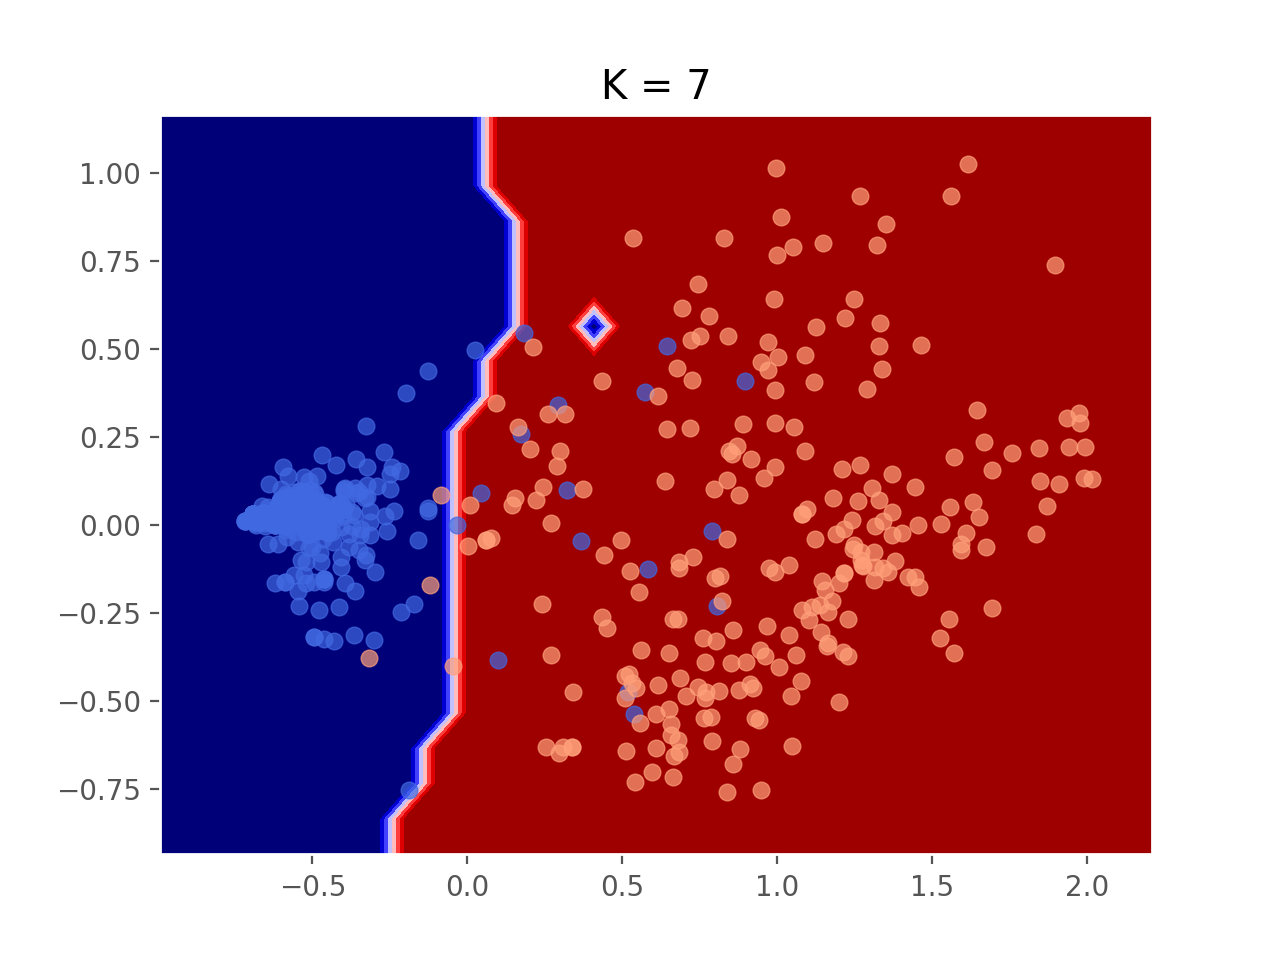

In [11]:
# plotting the samples and algorithm results
%matplotlib notebook
plottingFun(knn, X, y)

In [12]:
import seaborn as sns

print(pca.components_)

[[ 0.29841863  0.40486957  0.39284183  0.33172138  0.25015642  0.43766122
   0.29253046  0.35730058  0.12369248]
 [-0.0571177   0.22513624  0.15947204 -0.10222387  0.18898831 -0.7860129
   0.00810873  0.47735196  0.16943045]]


<IPython.core.display.Javascript object>


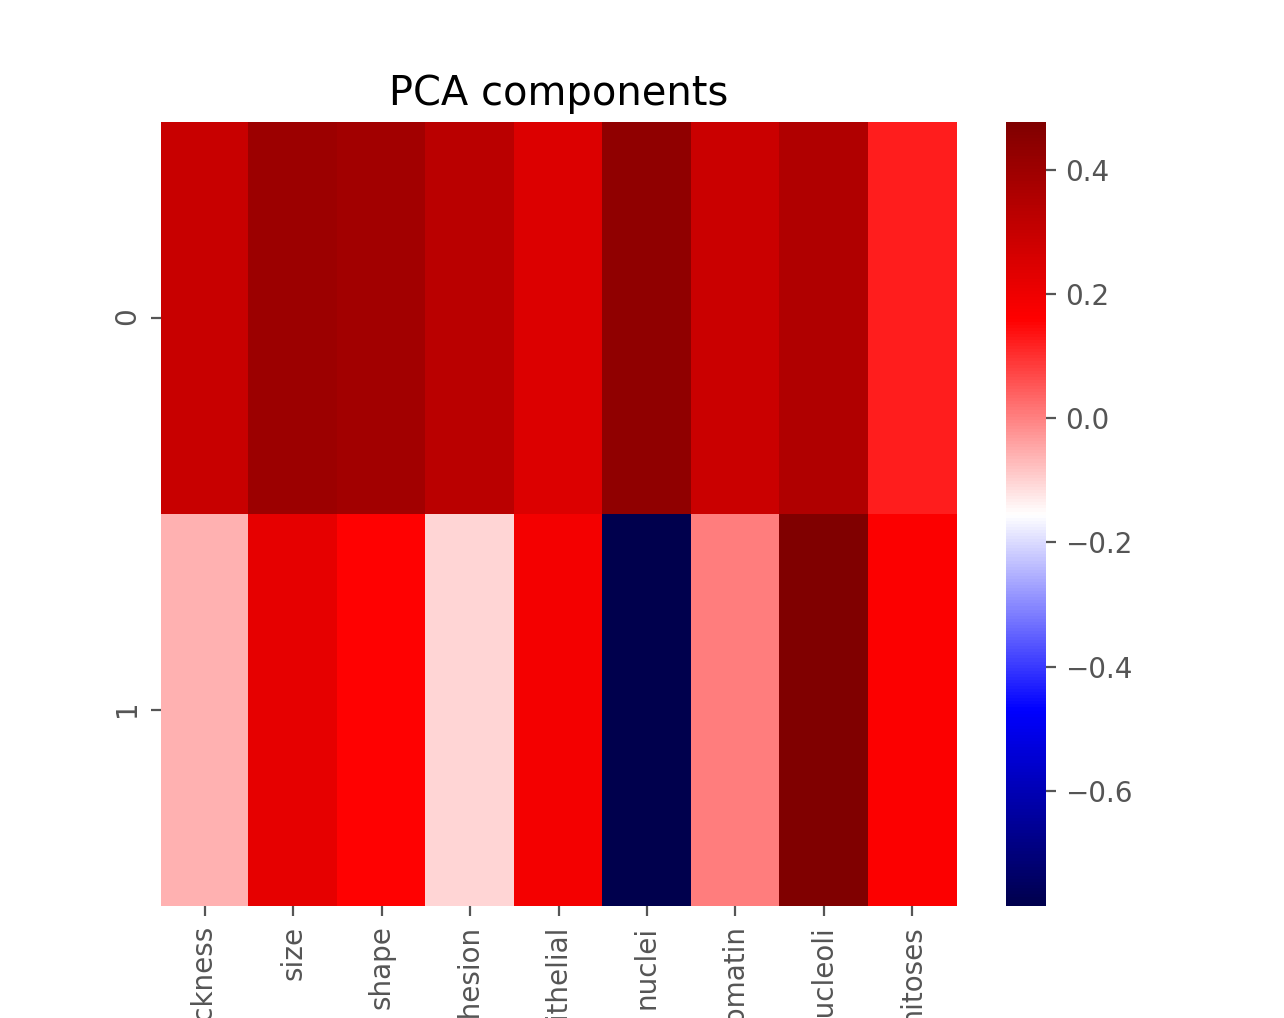

In [13]:
# plotting the inportance of pca components
map = pd.DataFrame(pca.components_, columns=['thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses'])
plt.figure()
plt.title('PCA components')
sns.heatmap(map, cmap='seismic')